<img src="./unal.png" align=left width="150" height="150"></img>

$\;$
---

<h2 align="center">RUTINA DE FILTRADO DE DATOS</h2>



---

In [ ]:
!ls

In [2]:
import pandas as pd
import numpy as np

El conjunto de datos hace referencia a mediciones de algunos indicadores en países del mundo como:
* Topic https://data.worldbank.org/topic/climate-change
* Co2 (kt).  https://data.worldbank.org/indicator/EN.ATM.CO2E.KT
* Cantidad de bosques deforestados ($Km^2$).  https://data.worldbank.org/indicator/AG.LND.FRST.K2
* Agricultura ($Km^2$). https://data.worldbank.org/indicator/AG.LND.AGRI.K2
* Población (7mM)  https://data.worldbank.org/indicator/SP.POP.TOTL
* Producción energetica (kWh per capita). https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC


Las bases de datos del **Work Bank** están divididas en 5 datasets, para cargarlos se usa header=2 puesto que este tipo de archivos tienen en las primeras 2 lineas contenido ajeno al analizar, es por esto que la lectura iniciara en la linea 2.

In [18]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)

In [19]:
df_popu.head(5)   #Se mide la población en cada año.

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


Se modificaran cosas para poder unir con el dataset de temperatura generado anteriormente

In [20]:
range(1971,2015)
map(str,range(1971,2015))         #genera una lista de años en formato texto
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))  #columnas a trabajar en el df
cols[:15]

['Country Name',
 'Country Code',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983']

melt para generar una serie de tiempo

In [21]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})     #lo que se hizo fue renombrar columnas como el dataset de la temperatura de paises a nivel mundial

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


Para cambiar el nombre de las columnas de los demas datasets, genero un for esto es posible porque todas las bases de datos en *workbank* tienen el mismo formato.

In [22]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',
              'Country Name':'Country',
              'Country Code':'name',
              'value':col})

In [23]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [29]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp['year'] = pd.to_datetime(df_temp['dt'])

idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]

df_t_avg = df_temp.groupby(['Country',
                 pd.Grouper(key='year', freq='1Y')                     #'1Y' es cada año
]).agg({'AverageTemperature':[np.mean,np.median]})

df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()

df_t_med['date'] = df_t_med['year'].dt.year     #permite extraer el año

df_t_med.rename(columns={'median':'temperature'}, inplace=True)   #inplace permite fijar el nombre en el df original
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [30]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


---
Al tener conjuntos de datos similares se procede a unirlos de la siguiente forma:

In [31]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')

In [32]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [33]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','date'],
                    how = 'inner')
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


In [34]:
df_climate = df_merge.dropna()      #quitando valores faltantes

---
Para saber cuáles son los países que producen mayor Co2, se tiene:

In [35]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)  #al clasificar por pais se tomara la variable Co2 y se tomara la mediana

Country
North America    5.886300e+06
United States    5.382124e+06
China            3.668918e+06
Japan            1.202083e+06
India            1.047706e+06
                     ...     
Haiti            1.651984e+03
Mozambique       1.584144e+03
Togo             1.285284e+03
Niger            7.847380e+02
Eritrea          6.142225e+02
Name: co2, Length: 120, dtype: float64

In [36]:
pd.set_option('display.float_format', '{:,.1f}'.format)     #colocando comas  y puntos y una cifra decimal

In [37]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

---
Generando scater plot con los 10 países que más contaminan el medio ambiente. 

In [38]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [39]:
df_max_co2 = df_climate[df_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

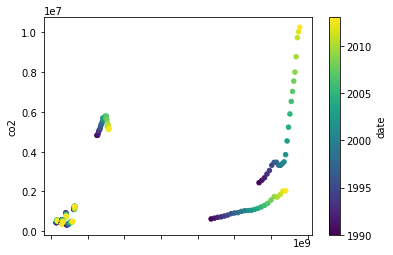

In [40]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')

cada una de los grupos de puntos representan un país, en esta gráfica se puede objservar que al pasar los años, en especial desde 1990 hasta 2015 los países han aumentado su temperatura promedio. Así mismo se identifica una correlación con el crecimiento de la población.

In [41]:
df_climate.corr()

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [42]:
import seaborn as sns

<AxesSubplot:>

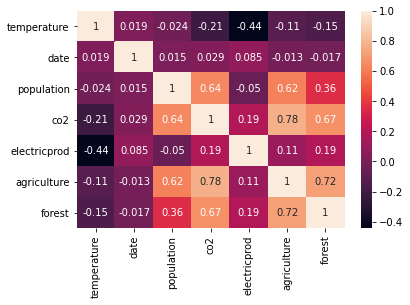

In [43]:
sns.heatmap(df_climate.corr(), annot=True)

Aqui se puede observar que a nivel de país el $CO_2$ está intimamente relacionado con la agricultura en crecimiento y la deforestación. Miremos las correlaciones de las diferentes variables a gran escala. 

In [44]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


<AxesSubplot:>

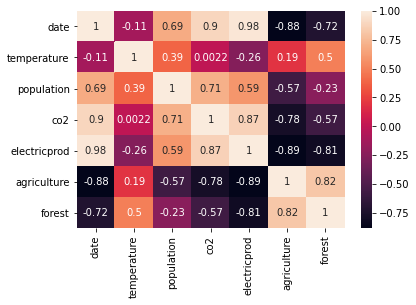

In [45]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

Aqí se evidencia un analísis diferente puesto que existe una relación muy intima entre (años-electricidadproducida), (años, co2), (co2 , elctricidad), (agricultura y deforestacion)

### Matriz de scatter plot

In [46]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

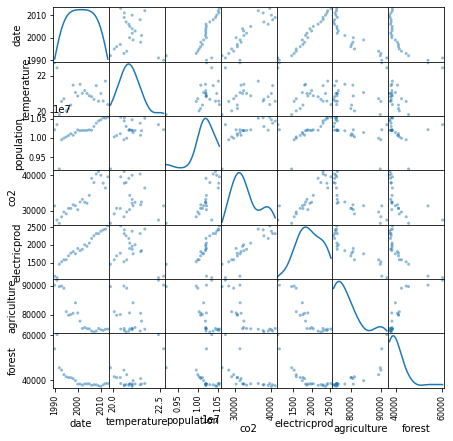

In [47]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (7,7))

---
### Gráfica de coordenadas paralelas con países de suramerica.

In [48]:
from pandas.plotting import parallel_coordinates

In [49]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]

<AxesSubplot:>

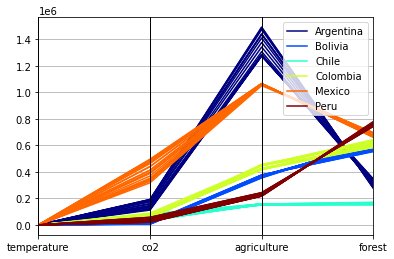

In [50]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')

Aqí puede observarse que Argentina es muy superior en agricultura que los demás países de la región, En términos de deforestación Perú es lider de la región. Además Mexico es el país que más genera $CO_2$